In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import warnings; warnings.simplefilter('ignore')
import time
import imblearn
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import NMF
from sklearn import cluster
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold #for K-fold cross
from sklearn.model_selection import cross_val_score #scoreevaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss # underSampling
from imblearn.over_sampling import SMOTE # OverSampling
from imblearn.combine import SMOTEENN # Combination of the 2
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, neighbors
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import LatentDirichletAllocation as LDA
from tqdm import tqdm_notebook as tqdm

In [3]:
df=pd.read_csv ('dataset.csv')
df.tail(12)

,Unnamed: 0,label,text,databersih
4536,387,0.0,Klarifikasi Terkait Perbedaan Hasil Situng KPU...,klarifikasi kait beda hasil situng kpu pindah ...
4537,388,0.0,“PKS dan Gerindra Purwakarta Bantah Pasang Spa...,pks gerindra purwakarta bantah pasang spanduk ...
4538,389,0.0,Universitas Muhammadiyah Kupang Bantah Akan Me...,universitas muhammadiyah kupang bantah mengini...
4539,390,0.0,Klarifikasi Atas Isu OTT Bupati Kapuas Oleh KPK,klarifikasi isu ott bupati kapuas kpk
4540,391,0.0,“Kronologis Polisi Berondong Sedan Terobos Raz...,kronologis polisi berondong sedan terobos razi...
4541,392,1.0,Foto Sekarang malesiya sapu habis penduduk asi...,malesiya sapu habis duduk asing perhati perhat...
4542,393,1.0,Foto Sekarang malesiya sapu habis penduduk asi...,malesiya sapu habis duduk asing perhati perhat...
4543,394,0.0,Klarifikasi Polres Bogor Terkait Pembuatan SIM...,klarifikasi polres bogor kait sim tes 150 ac...
4544,395,0.0,Ketua INASGOC Bantah Indonesia Bermain Curang ...,ketua inasgoc bantah indonesia main curang cab...
4545,396,0.0,Klarifikasi “Kenapa sholat di tempat ibadah ag...,klarifikasi sholat ibadah agama darurat


In [4]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5,ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(df['databersih'])
tfidf.shape

(4548, 3133)

In [5]:
##TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
#vectorizer = TfidfVectorizer(ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_df=0.1, min_df=5, ngram_range=(1, 2))

listdata=df['databersih'].values.astype('object')
listdata = [d for d in listdata]

listdata
v = TfidfVectorizer(decode_error='replace', encoding='utf-8')
tfidf = v.fit_transform(df['databersih'].values.astype('U'))
y = df.iloc[:, 2].values
print(tfidf.shape, len(y)) 

(4548, 13786) 4548


In [6]:
from sklearn.model_selection import train_test_split
seed = 1
X = df['databersih'].values.astype('U')
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
X_train = vectorizer.fit_transform(X_train) # "Fit_Transform"
X_test = vectorizer.transform(X_test) # Perhatikan disini hanya "Transform"

print(X_train.shape, X_test.shape)

(3183, 2309) (1365, 2309)


In [7]:
#balancing
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='all')
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(X_train_res.shape, X_test.shape) #xtrain yang nambah

(4830, 2309) (1365, 2309)


In [8]:
#SVM
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dSVM = svm.SVC( kernel = 'linear')
dSVM.fit(X_train, y_train)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.8227106227106227
[[126 212]
 [ 30 997]]
              precision    recall  f1-score   support

         0.0       0.81      0.37      0.51       338
         1.0       0.82      0.97      0.89      1027

    accuracy                           0.82      1365
   macro avg       0.82      0.67      0.70      1365
weighted avg       0.82      0.82      0.80      1365



In [9]:
dSVM = svm.SVC( kernel = 'linear')
dSVM.fit(X_train_res, y_train_res)
y_SVM = dSVM.predict(X_test)
print('Akurasi = ', accuracy_score(y_test, y_SVM))
print(confusion_matrix(y_test, y_SVM))
print(classification_report(y_test, y_SVM))

Akurasi =  0.73992673992674
[[209 129]
 [226 801]]
              precision    recall  f1-score   support

         0.0       0.48      0.62      0.54       338
         1.0       0.86      0.78      0.82      1027

    accuracy                           0.74      1365
   macro avg       0.67      0.70      0.68      1365
weighted avg       0.77      0.74      0.75      1365



In [10]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver="lbfgs", multi_class="auto")
model_logreg.fit(X_train, y_train)
Y_pred = model_logreg.predict(X_test)
print("Accuracy:", accuracy_score(Y_pred, y_test))
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.8212454212454212
[[ 105  233]
 [  11 1016]]
              precision    recall  f1-score   support

         0.0       0.91      0.31      0.46       338
         1.0       0.81      0.99      0.89      1027

    accuracy                           0.82      1365
   macro avg       0.86      0.65      0.68      1365
weighted avg       0.84      0.82      0.79      1365



In [11]:
#res
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(solver="lbfgs", multi_class="auto")
model_logreg.fit(X_train_res, y_train_res)
Y_pred = model_logreg.predict(X_test)
print("Accuracy:", accuracy_score(Y_pred, y_test))
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

Accuracy: 0.7758241758241758
[[208 130]
 [176 851]]
              precision    recall  f1-score   support

         0.0       0.54      0.62      0.58       338
         1.0       0.87      0.83      0.85      1027

    accuracy                           0.78      1365
   macro avg       0.70      0.72      0.71      1365
weighted avg       0.79      0.78      0.78      1365



In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))

Accuracy: 0.8139194139194139
[[157 181]
 [ 73 954]]
              precision    recall  f1-score   support

         0.0       0.68      0.46      0.55       338
         1.0       0.84      0.93      0.88      1027

    accuracy                           0.81      1365
   macro avg       0.76      0.70      0.72      1365
weighted avg       0.80      0.81      0.80      1365



In [13]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
y_rf = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_rf))
print(confusion_matrix(y_test, y_rf))
print(classification_report(y_test, y_rf))

Accuracy: 0.7846153846153846
[[200 138]
 [156 871]]
              precision    recall  f1-score   support

         0.0       0.56      0.59      0.58       338
         1.0       0.86      0.85      0.86      1027

    accuracy                           0.78      1365
   macro avg       0.71      0.72      0.72      1365
weighted avg       0.79      0.78      0.79      1365



In [14]:
from sklearn.model_selection import GridSearchCV 
parameters = [{"n_estimators":[10,20,30,40], "max_depth":[4, 5, 10, 20, 100, 300, 500],"random_state":[0]}]
Rf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, scoring = "accuracy")
Rf.fit(X_train, y_train)
print(Rf.best_estimator_)
print(Rf.best_score_)

RandomForestClassifier(max_depth=100, n_estimators=40, random_state=0)
0.8293970939058773


In [15]:
svm= GridSearchCV(SVC(kernel='linear'),
param_grid = {'C': [0.1, 1, 10, 100, 1000]},cv=10, scoring='accuracy')
svm.fit(X_train, y_train)
print('Parameter terbaik:{}\nbest score:{}'.format(svm.best_params_, svm.best_score_))

Parameter terbaik:{'C': 1}
best score:0.831918731886201


In [16]:
clf=GridSearchCV(LogisticRegression(solver="lbfgs", multi_class="auto"),
param_grid={"C":[0,0.1,1,2,3] ,"penalty":["l1","l2"]},cv=10, scoring='accuracy')
#param_grid={"C":np.logspace(-,3,7), "penalty":["l1","l2"]},cv=10, scoring='accuracy')
clf.fit(X_train,y_train)

print("best parameters",clf.best_params_)
print("accuracy :",clf.best_score_)

C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_valida

C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tamu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_valida

best parameters {'C': 3, 'penalty': 'l2'}
accuracy : 0.8265826777863212


C:\Users\tamu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.75966069        nan 0.81715364
        nan 0.8256383         nan 0.82658268]
  warnings.warn(


In [17]:
svm_=SVC(kernel= 'linear', C= 1)
Rf_=RandomForestClassifier(max_depth=100, n_estimators=40, random_state=0)
clf=LogisticRegression(C=1,penalty='l2')

In [47]:
#svm_=SVC(kernel= 'rbf', C= 1)
#Rf_=RandomForestClassifier(max_depth=100, n_estimators=40, random_state=0)
#clf=LogisticRegression(C=3,penalty='l2')

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:   13.2s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  10 out of  10 | elapsed:    0.4s finished


Accuracy SVM: 0.83 (+/- 0.02)
Accuracy Rf: 0.83 (+/- 0.02)
Accuracy logistic: 0.83 (+/- 0.02)


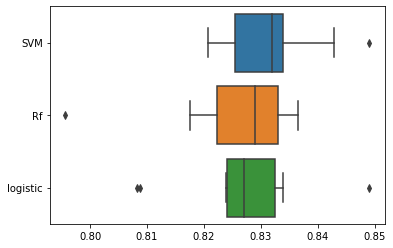

In [41]:
model_ = ["SVM", "Rf","logistic"]

svm_score = cross_val_score(svm_, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
Rf_score= cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
clf_score= cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-2, verbose=1)
score_ = [ svm_score, Rf_score,clf_score]
data = {m:s for m,s in zip(model_, score_)}
for name in data.keys():
    print("Accuracy %s: %0.2f (+/- %0.2f)" % (name, data[name].mean(), data[name].std() * 2))
sns.boxplot(data=pd.DataFrame(data), orient='h')
plt.savefig("plot.png")

In [59]:
data

{'SVM': array([0.8338558 , 0.830721  , 0.8338558 , 0.8427673 , 0.8490566 ,
        0.82075472, 0.83018868, 0.82075472, 0.82389937, 0.83333333]),
 'Rf': array([0.830721  , 0.8338558 , 0.82758621, 0.83647799, 0.82704403,
        0.81761006, 0.83647799, 0.79559748, 0.82075472, 0.83018868]),
 'logistic': array([0.8338558 , 0.82445141, 0.80877743, 0.83333333, 0.8490566 ,
        0.83018868, 0.82704403, 0.8081761 , 0.82704403, 0.82389937])}

In [48]:
svm_.fit(X_train, y_train)
y_pred = svm_.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Akurasi : ', accuracy_score(y_test, y_pred))

[[ 119  219]
 [   8 1019]]
              precision    recall  f1-score   support

         0.0       0.94      0.35      0.51       338
         1.0       0.82      0.99      0.90      1027

    accuracy                           0.83      1365
   macro avg       0.88      0.67      0.71      1365
weighted avg       0.85      0.83      0.80      1365

Akurasi :  0.8336996336996337


In [42]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Akurasi : ', accuracy_score(y_test, y_pred))

[[135 203]
 [ 34 993]]
              precision    recall  f1-score   support

         0.0       0.80      0.40      0.53       338
         1.0       0.83      0.97      0.89      1027

    accuracy                           0.83      1365
   macro avg       0.81      0.68      0.71      1365
weighted avg       0.82      0.83      0.80      1365

Akurasi :  0.8263736263736263


In [21]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

import sklearn
sklearn.metrics.accuracy_score(y_test, y_pred)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Akurasi : ', accuracy_score(y_test, y_pred))

[[157 181]
 [ 66 961]]
              precision    recall  f1-score   support

         0.0       0.70      0.46      0.56       338
         1.0       0.84      0.94      0.89      1027

    accuracy                           0.82      1365
   macro avg       0.77      0.70      0.72      1365
weighted avg       0.81      0.82      0.81      1365

Akurasi :  0.819047619047619


In [22]:
# import model and matrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score


In [23]:
# define model
lg1 = LogisticRegression(random_state=13, class_weight=None)
# fit it
lg1.fit(X_train,y_train)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.8212454212454212
Confusion Matrix: 
[[ 105  233]
 [  11 1016]]
Area Under Curve: 0.6499700396974009
Recall score: 0.9892891918208374


In [24]:
# define model imbalance
lg1 = LogisticRegression(random_state=13, class_weight=None)
# fit it
lg1.fit(X_train_res,y_train_res)
# test
y_pred = lg1.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.7758241758241758
Confusion Matrix: 
[[208 130]
 [176 851]]
Area Under Curve: 0.7220058422590069
Recall score: 0.8286270691333982


In [25]:
# define class weights
w = {0:1, 1:99}
# define model
lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')

Accuracy Score: 0.764102564102564
Confusion Matrix: 
[[  16  322]
 [   0 1027]]
Area Under Curve: 0.5236686390532544
Recall score: 1.0


In [26]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]
hyperparam_grid = {"class_weight": w }

In [27]:
# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=100, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)
print(f'Best score: {grid.best_score_} with param:{grid.best_params_}')

Best score: 0.8046601190476192 with param:{'class_weight': {0: 1.0, 1: 1.0}}
